<a href="https://colab.research.google.com/github/Sokey123456/machine-learning/blob/main/%E8%BF%91%E5%82%8D%E6%B3%95%2Cipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **近傍法による異常検知**
## **目的**
 - 近傍法の概念理解(定義、仮定、性質等)
 - 近傍法の実装
 - 近傍法の課題の理解

## **モチベーション**
 - ホテリングの$T^2$法を実用上有効なのは、観測値がほぼ一定値の周りに集中している時 → 近傍法ではそのような制約がない


## **ラベルなしデータに対する$k$近傍法**

### **訓練データの定義**
(ラベル無しの訓練データを考える)
$$\mathcal{D} = \{ x^{(n)}\in \mathbb{R}^M: n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.

### 経験分布の定義
経験分布を次として定義する
$$
p_{emp} (x|\mathcal{D})dx = \frac{1}{N} \sum_{n=1}^N \delta(x-x^{(n)})dx
$$
ただし、$\delta(\cdot)$ はディラックのデルタ関数である\
($\mathcal{D}$の中で「経験された」値のところでのみ値を持ち、そのほかの点では0になるという事実に由来している)






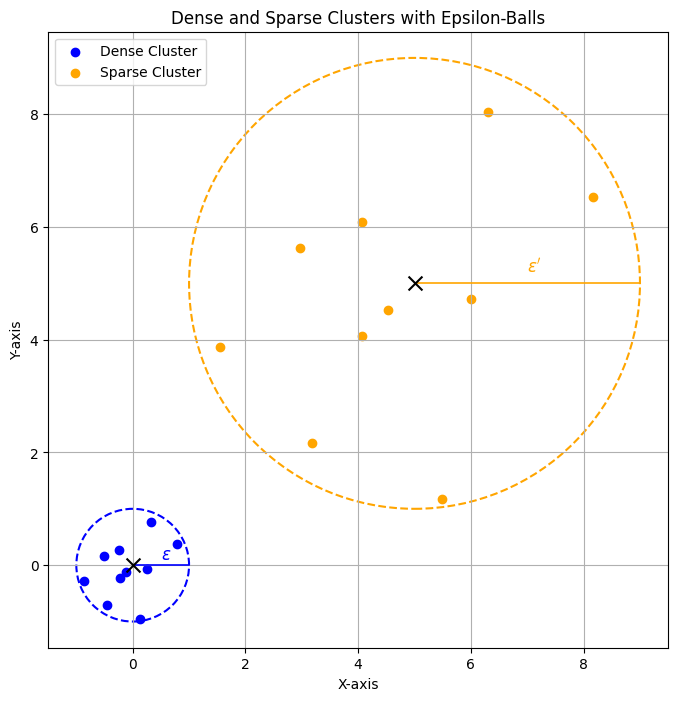

In [ ]:
from sklearn.datasets import make_blobs

# Generate dense and sparse clusters using make_blobs
n_dense = 10  # Number of points in the dense cluster
n_sparse = 10  # Number of points in the sparse cluster
cluster_std_dense = 0.5  # Smaller standard deviation for dense cluster
cluster_std_sparse = 2.0  # Larger standard deviation for sparse cluster

# Dense cluster centered at (0, 0)
dense_cluster, _ = make_blobs(
    n_samples=n_dense, centers=[[0, 0]], cluster_std=cluster_std_dense, random_state=42
)

# Sparse cluster centered at (5, 5)
sparse_cluster, _ = make_blobs(
    n_samples=n_sparse, centers=[[5, 5]], cluster_std=cluster_std_sparse, random_state=42
)

# Plot the clusters
plt.figure(figsize=(8, 8))
plt.scatter(dense_cluster[:, 0], dense_cluster[:, 1], label="Dense Cluster", color="blue")
plt.scatter(sparse_cluster[:, 0], sparse_cluster[:, 1], label="Sparse Cluster", color="orange")

# Draw circles around the clusters
dense_center = [0, 0]
sparse_center = [5, 5]

circle_dense = plt.Circle(dense_center, cluster_std_dense * 2, color='blue', fill=False, linestyle='--', linewidth=1.5)
circle_sparse = plt.Circle(sparse_center, cluster_std_sparse * 2, color='orange', fill=False, linestyle='--', linewidth=1.5)

# Mark centers with 'x' and add epsilon labels
plt.scatter(*dense_center, color='black', marker='x', s=100, zorder=5)
plt.scatter(*sparse_center, color='black', marker='x', s=100, zorder=5)
plt.text(dense_center[0] + cluster_std_dense, dense_center[1] + 0.1, r"$\epsilon$", fontsize=12, color="blue")
plt.text(sparse_center[0] + cluster_std_sparse , sparse_center[1] +0.2 , r"$\epsilon '$", fontsize=12, color="orange")


# Draw lines representing the radius
plt.plot([dense_center[0], dense_center[0] + cluster_std_dense * 2],
         [dense_center[1], dense_center[1]],
         color='blue', linestyle='-', linewidth=1.2)
plt.plot([sparse_center[0], sparse_center[0] + cluster_std_sparse * 2],
         [sparse_center[1], sparse_center[1]],
         color='orange', linestyle='-', linewidth=1.2)

plt.gca().add_patch(circle_dense)
plt.gca().add_patch(circle_sparse)

# Labels and appearance
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Dense and Sparse Clusters with Epsilon-Balls")
plt.gca().set_aspect('equal', adjustable='datalim')
plt.legend()
plt.grid(True)
plt.show()


上記の図のように$x'$を中心とした十分小さい半径$\epsilon$の球を考え、この中の確率密度は一定であるとする
つまり、以下のニアリーイコールが言える
$\forall$ ${k}\in\mathbb{N}$, $∃$ $ϵ(k)>0$ s.t. 濃度$Card(V_M(\epsilon,x')) = k$\
ただし、
$$
V_M(\epsilon,x') = \{(x_1,\cdots,x_M)^T\in\mathbb{R}^M: x_1^2 + \cdot +x_M^2 \le \epsilon\}
$$

kを固定する.この時、上記の条件を満たす$\epsilon'>0$に対して
$$
p(x') \times |V_M(\epsilon,x')| \approx \int_{x\in V_M(\epsilon', x')} p_{emp}(x|\mathcal{D}) dx
$$
ただし、
$$
V_M(\epsilon,x') = \{(x_1,\cdots,x_M)^T\in\mathbb{R}^M: x_1^2 + \cdot +x_M^2 \le \epsilon\}
$$
であり、
$
|V_M(\epsilon,x')|
$はその体積である.
これにより、
$$
p(x') \approx \frac{1}{|V_M(\epsilon',x')| }\int_{x\in V_M(\epsilon', x')} p_{emp}(x|\mathcal{D}) dx
= \frac{1}{N|V_M(\epsilon',x')|} \sum_{n=1}^N \int_{x\in V_M(\epsilon', x')}\delta(x-x^{(n)})dx
= \frac{k}{N|V_M(\epsilon',x')|}
$$
### **異常度の定義式**
今回の異常度を次で定める\
$\forall{x}\in\mathbb{R}^M$,$a(x) =   -\ln p(x'|\mathcal{D})$

#### 異常度の計算
上記の$x'$に対して次が成り立つ
$$
a(x') = -\ln p(x') = -\ln k + M \ln \epsilon + C
$$
但し、$C$は実数の定数である

$k = 1$とすると、「最近棒標本までの距離が基準値より大きいものは異常度と判定する」という簡潔明瞭な基準が得られます.



## **ラベル付きデータに対する$k$近傍法**

## **訓練時**

### **訓練データの定義**
(ラベルありの訓練データを考える)
$$\mathcal{D} = \{ (x^{(n)},y^{(n)})\in \mathbb{R}^M\times\{0,1\} : n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.
#### **上記を定義の下では、以下を仮定されている**
**仮定：**$\mathcal{D}$ の中には異常標本が含まれていない、または含まれていたとしても圧倒的少数である


### **アルゴリズム 4.1: 近傍法による異常検知**

- **訓練時:**
  探索する $k$ と $a_{\text{th}}$ の候補を挙げておく.距離の定義を決める.それぞれの $(k, a_{\text{th}})$ について以下を行い、最大の $F$ 値を与えるパラメータ $(k^*, a_{\text{th}}^*)$ を選択する.

  1. $\mathcal{D}$ の中から標本 $x^{(n)}$ を選ぶ ($n = 1, \dots, N$).
  2. 残りの $N-1$ 個の標本の中から、$x^{(n)}$ に最も近い標本を $k$ 個選ぶ.
  3. 以下の式 (4.4) に基づいて、$a(x^{(n)})$ を計算し異常かどうかを判定する.
    
    $$
    a(x') = \ln \frac{p(x'|y=1, \mathcal{D})}{p(x'|y=0,\mathcal{D})} = \ln \frac{\pi^0}{\pi^1}\cdot \frac{N^1(x')}{N^0(x')} =\frac{N^1(x')}{N^0(x')} - \ln \frac{\pi^1}{\pi^0}
    $$
  ただし、
    - $\pi^0$ は全標本に対する正常の割合
    - $\pi^1$は全標本に対する異常の割合
    - $N^1$は$k$個中$\epsilon>0$の近傍内に入った異常の個数
    - $N^0$は$k$個中$\epsilon>0$の近傍内に入った正常の個数

  4. $N$ 個の標本すべてに判定結果が出揃ったら、正常標本精度と異常標本精度を計算し、$F$ 値を求める.それを $(k, a_{\text{th}})$ の評価値とする.

- **運用時:**
  1. 新たな観測値 $x'$ に対して、最近傍 $k^*$ 個を $\mathcal{D}$ から選ぶ.
  2. $a(x') > a_{\text{th}}^*$ なら $x'$ を異常と判定する.


In [ ]:
# パラメータ設定
n_samples = 500  # サンプル総数
normal_samples = 0.9  # 正常データの割合
k = 10  # k近傍の数

def make_sample_data(n_samples,normal_samples):
    # 正常データと異常データの数を計算
    n_normal = int(n_samples * normal_samples)
    n_anomaly = n_samples - n_normal

    # 正常データと異常データを生成
    X_normal, _ = make_blobs(n_samples=n_normal, centers=[[0, 0]], cluster_std=1.0, random_state=42)
    X_anomaly, _ = make_blobs(n_samples=n_anomaly, centers=[[1, 1]], cluster_std=1.0, random_state=42)

    # ラベル付けしてデータを結合
    X = np.vstack((X_normal, X_anomaly))
    y = np.array( [0] * n_normal + [1] * n_anomaly )
    return X, y

def calcurate_anomaly_score(X,y,pi_normal,pi_anomaly, indices):
    epsilon = 0.1  # ゼロ割防止用の小さい値

    # 各点の異常スコアを計算
    anomaly_scores = []
    for i, neighbors in enumerate(indices):
        # 近傍内の正常データ(N^0)と異常データ(N^1)の個数
        N_normal = np.sum(y[neighbors] == 0)
        N_anomaly = np.sum(y[neighbors] == 1)

        # ゼロ割を防ぐためにepsilonを適用
        N_normal = max(N_normal, epsilon)
        N_anomaly = max(N_anomaly, epsilon)

        # 異常スコアの計算
        score = np.log((pi_anomaly * N_anomaly) / (pi_normal * N_normal))
        anomaly_scores.append(score)

    anomaly_scores = np.array(anomaly_scores)
    return anomaly_scores

def neighborhood_method(n_samples,normal_samples, k):
    epsilon = 0.1  # ゼロ割防止用の小さい値

    X, y = make_sample_data(n_samples,normal_samples)

    # 最近傍探索
    nbrs = NearestNeighbors(n_neighbors=k).fit(X)
    distances, indices = nbrs.kneighbors(X)

    # πの計算（正常と異常の割合）
    pi_normal = np.mean(y == 0)
    pi_anomaly = np.mean(y == 1)

    anomaly_scores = calcurate_anomaly_score(X,y,pi_normal,pi_anomaly, indices)

    return anomaly_scores, X, y

def evaluate_anomaly_score(anomaly_scores, y, thresh):
    predictions = (anomaly_scores > thresh).astype(int)  # スコアが閾値より大きい場合は異常と判定

    # 精度 (precision)、再現率 (recall)、F値 (F1-score) を計算
    precision_normal = precision_score(y, predictions, pos_label=0)  # 正常標本精度
    recall_normal = recall_score(y, predictions, pos_label=0)  # 正常標本再現率
    precision_anomaly = precision_score(y, predictions, pos_label=1)  # 異常標本精度
    recall_anomaly = recall_score(y, predictions, pos_label=1)  # 異常標本再現率

    # 異常検知全体のF値を計算
    f1 = f1_score(y, predictions)

    # 結果表示
    results = {
        "正常標本精度 (Precision for Normal)": precision_normal,
        "正常標本再現率 (Recall for Normal)": recall_normal,
        "異常標本精度 (Precision for Anomaly)": precision_anomaly,
        "異常標本再現率 (Recall for Anomaly)": recall_anomaly,
        "F値 (F1 Score)": f1
    }

    results_df = pd.DataFrame([results])

    return results_df

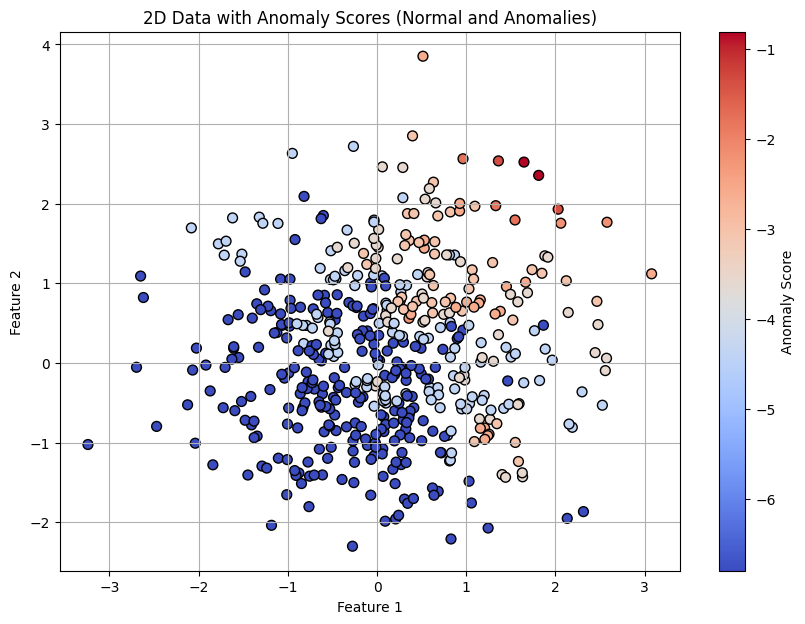

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

# パラメータ設定
n_samples = 500  # サンプル総数
normal_samples = 0.9  # 正常データの割合
k = 10  # k近傍の数
epsilon = 0.1  # ゼロ割防止用の小さい値

anomaly_scores, X, y = neighborhood_method(n_samples, normal_samples, k)

# 散布図のプロット
plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=anomaly_scores, cmap='coolwarm', s=50, edgecolor='k')
plt.colorbar(label='Anomaly Score')
plt.title('2D Data with Anomaly Scores (Normal and Anomalies)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()



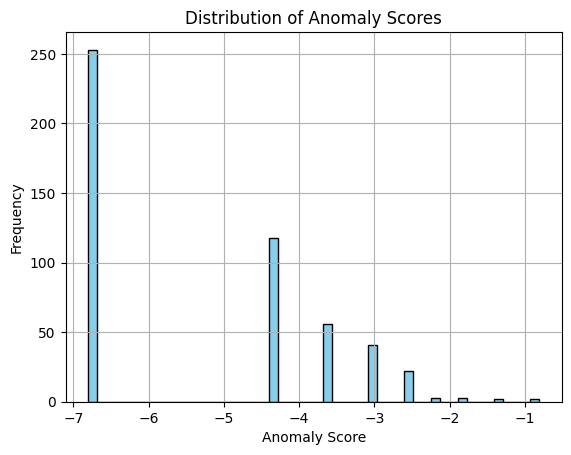

In [ ]:
# 異常スコアの分布をプロット
plt.hist(anomaly_scores, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### **定義(正常標本精度, 異常標本精度)**

#### **真陽性率,正常標本精度 (TP: True Positive Rate)**
$$
TP = \frac{\sum_{i=1}^N \mathbb{1}(a(x_i) > \text{thresh}) \cdot \mathbb{1}(y_i = 1)}{\sum_{i=1}^N \mathbb{1}(y_i = 1)}
$$

- $\mathbb{1}(a(x_i) > \text{thresh})$: 異常スコア $a(x_i)$ が閾値 $\text{thresh}$ を超えた場合に1、それ以外は0.
- $\mathbb{1}(y_i = 1)$: 実際に異常ラベル ($y_i = 1$) の場合に1、それ以外は0.
- **分子**: 正しく異常と検出されたサンプル数.
- **分母**: 実際に異常ラベルであるサンプル数.

---

#### **真負率,  異常標本精度 (TF: True Negative Rate)**
$$
TF = \frac{\sum_{i=1}^N \mathbb{1}(a(x_i) \leq \text{thresh}) \cdot \mathbb{1}(y_i = 0)}{\sum_{i=1}^N \mathbb{1}(y_i = 0)}
$$
- $\mathbb{1}(a(x_i) \leq \text{thresh})$: 異常スコア $a(x_i)$ が閾値 $\text{thresh}$ 以下の場合に1、それ以外は0.
- $\mathbb{1}(y_i = 0)$: 実際に正常ラベル ($y_i = 0$) の場合に1、それ以外は0.
- **分子**: 正しく正常と検出されたサンプル数.
- **分母**: 実際に正常ラベルであるサンプル数.

---

### 意味
- **$TP$ (True Positive Rate)**: 異常ラベルのデータのうち、正しく異常として検出された割合.
- **$TF$ (True Negative Rate)**: 正常ラベルのデータのうち、正しく正常として検出された割合.


### **手順**

#### 1. **探索範囲の設定**
- $k$: k近傍法の近傍数を指定するパラメータ.
- $a_\text{th}$: 異常スコアの閾値.
- $k$ と $a_\text{th}$ の候補値をそれぞれ設定します.

---

#### 2. **各組み合わせで異常検知の判定を実行**
- 各 $(k, a_\text{th})$ の組み合わせに対して、異常検知の結果を計算します.

---

#### 3. **評価指標 (F値) を計算**
- 異常検知結果の精度（Precision）と再現率（Recall）を基に $F$ 値を計算します.

$$
F = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

---

#### 4. **最適なパラメータを選択**
- 計算された $F$ 値が最大となる $(k, a_\text{th})$ の組み合わせを選択します.


In [ ]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score


# 閾値を設定して異常検知結果を決定
ath = -5  # 異常スコアの閾値（調整可能）
predictions = (anomaly_scores > ath).astype(int)  # スコアが閾値より大きい場合は異常と判定

# 精度 (precision)、再現率 (recall)、F値 (F1-score) を計算
precision_normal = precision_score(y, predictions, pos_label=0)  # 正常標本精度
recall_normal = recall_score(y, predictions, pos_label=0)  # 正常標本再現率
precision_anomaly = precision_score(y, predictions, pos_label=1)  # 異常標本精度
recall_anomaly = recall_score(y, predictions, pos_label=1)  # 異常標本再現率

# 異常検知全体のF値を計算
f1 = f1_score(y, predictions)

# 結果表示
results = {
    "正常標本精度 (Precision for Normal)": precision_normal,
    "正常標本再現率 (Recall for Normal)": recall_normal,
    "異常標本精度 (Precision for Anomaly)": precision_anomaly,
    "異常標本再現率 (Recall for Anomaly)": recall_anomaly,
    "F値 (F1 Score)": f1
}

results_df = pd.DataFrame([results])


In [ ]:
# パラメータ設定
n_samples = 500  # サンプル総数
normal_samples = 0.9  # 正常データの割合


# パラメータ候補の設定
k_values = range(1, 21)  # kの候補 (1から20まで)
ath_values = np.linspace(-8, -0.5, 50)  # 異常スコアの閾値候補

best_f1 = -1
best_k = None
best_ath = None

for k in k_values:
    print(f"k = {k}")
    for ath in ath_values:
        print(f"ath = {ath}")
        anomaly_scores, X, y = neighborhood_method(n_samples, normal_samples, k)
        results_df = evaluate_anomaly_score(anomaly_scores, y, ath)
        f1 = results_df["F値 (F1 Score)"].values[0]
        if f1 > best_f1:
            best_f1 = f1
            best_k = k
            best_ath = ath

print("Best k:", best_k)
print("Best ath:", best_ath)
print("Best F1 Score:", best_f1)

k = 1
ath = -8.0
ath = -7.846938775510204
ath = -7.6938775510204085
ath = -7.540816326530612
ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.775510204081632
ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525
ath = -5.857142857142858
ath = -5.704081632653061


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.6530612244897958
ath = -0.5
k = 2
ath = -8.0
ath = -7.846938775510204
ath = -7.6938775510204085
ath = -7.540816326530612
ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525
ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.6530612244897958
ath = -0.5
k = 3
ath = -8.0
ath = -7.846938775510204


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -7.6938775510204085
ath = -7.540816326530612
ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632
ath = -6.622448979591836


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525
ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.6530612244897958
ath = -0.5

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -7.6938775510204085
ath = -7.540816326530612
ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525
ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.65

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -7.540816326530612
ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.6530612244897958
ath = -0.5
k = 6
ath = -8.0
ath = -7.846938775510204
ath = -7.6938775510204085
ath = -7.540816326530612


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -7.387755102040816
ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449
ath = -6.0102040816326525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144
ath = -3.5612244897959187
ath = -3.408163265306122
ath = -3.2551020408163263
ath = -3.1020408163265305
ath = -2.9489795918367347
ath = -2.795918367346939
ath = -2.6428571428571423
ath = -2.4897959183673466
ath = -2.336734693877551
ath = -2.183673469387755
ath = -2.0306122448979593
ath = -1.8775510204081627
ath = -1.724489795918367
ath = -1.5714285714285712
ath = -1.4183673469387754
ath = -1.2653061224489797
ath = -1.112244897959184
ath = -0.9591836734693873
ath = -0.8061224489795915
ath = -0.6530612244897958
ath = -0.5
k = 7
ath = -8.0
ath = -7.846938775510204
ath = -7.6938775510204085
ath = -7.540816326530612
ath = -

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

ath = -7.23469387755102
ath = -7.081632653061225
ath = -6.928571428571429
ath = -6.775510204081632
ath = -6.622448979591836
ath = -6.469387755102041
ath = -6.316326530612245
ath = -6.163265306122449


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ath = -6.0102040816326525
ath = -5.857142857142858
ath = -5.704081632653061
ath = -5.551020408163265
ath = -5.3979591836734695
ath = -5.244897959183673
ath = -5.091836734693878
ath = -4.938775510204081
ath = -4.785714285714286
ath = -4.63265306122449
ath = -4.479591836734693
ath = -4.326530612244898
ath = -4.173469387755102
ath = -4.020408163265306
ath = -3.86734693877551
ath = -3.7142857142857144


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



ath = -3.5612244897959187
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-57-e181f2f7097c>", line 18, in <cell line: 14>
    anomaly_scores, X, y = neighborhood_method(n_samples, normal_samples, k)
  File "<ipython-input-55-fe6835a67db1>", line 54, in neighborhood_method
    anomaly_scores = calcurate_anomaly_score(X,y,pi_normal,pi_anomaly, indices)
  File "<ipython-input-55-fe6835a67db1>", line 27, in calcurate_anomaly_score
    N_normal = np.sum(y[neighbors] == 0)
  File "/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py", line 2172, in _sum_dispatcher
    def _sum_dispatcher(a, axis=None, dtype=None, out=None, keepdims=None,
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython

TypeError: object of type 'NoneType' has no len()

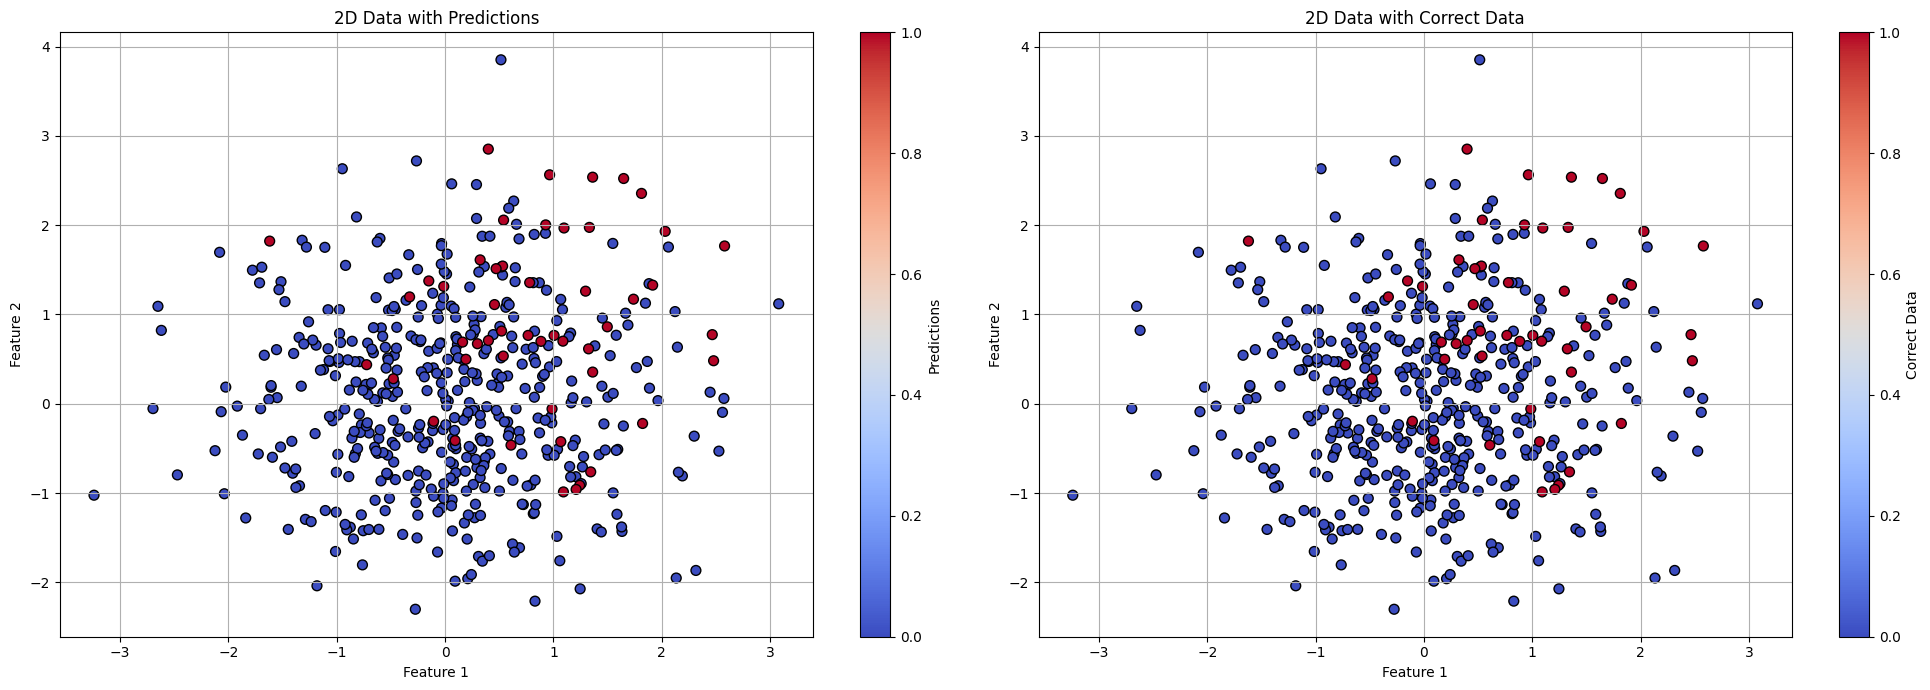

In [ ]:
# パラメータ設定
n_samples = 500  # サンプル総数
normal_samples = 0.9  # 正常データの割合

anomaly_scores, X, y = neighborhood_method(n_samples, normal_samples, best_k)
predictions = (anomaly_scores >  best_ath).astype(int)  # スコアが閾値より大きい場合は異常と判定

import matplotlib.pyplot as plt

# 隣同士にプロットする設定
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# 左側: 予測結果の散布図
scatter1 = axes[0].scatter(X[:, 0], X[:, 1], c=predictions, cmap='coolwarm', s=50, edgecolor='k')
axes[0].set_title('2D Data with Predictions')
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')
axes[0].grid(True)
fig.colorbar(scatter1, ax=axes[0], label='Predictions')

# 右側: 正解データの散布図
scatter2 = axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=50, edgecolor='k')
axes[1].set_title('2D Data with Correct Data')
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].grid(True)
fig.colorbar(scatter2, ax=axes[1], label='Correct Data')

plt.tight_layout()
plt.show()


### **運用時**

In [ ]:
sample_anomaly, _ = make_blobs(n_samples=1, centers=[[0, 0]], cluster_std=1.0, random_state=42)
X, y = make_sample_data(n_samples,normal_samples)
X = np.vstack((X, sample_anomaly))
y = np.append(y, 1)

# 最近傍探索
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, indices = nbrs.kneighbors(X)

# πの計算（正常と異常の割合）
pi_normal = np.mean(y == 0)
pi_anomaly = np.mean(y == 1)

anomaly_scores = calcurate_anomaly_score(X,y,pi_normal,pi_anomaly, indices)

if anomaly_scores[-1] > best_ath:
    print("異常")
else:
    print("正常")

異常


## **マージン最大化近傍法**


## **計量学習とは**
### **訓練データの定義**
(ラベルありの訓練データを考える)
$$\mathcal{D} = \{ (x^{(n)},y^{(n)})\in \mathbb{R}^M\times\{0,1\} : n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.
#### **上記を定義の下では、以下を仮定されている**
**仮定：**$\mathcal{D}$ の中には異常標本が含まれていない、または含まれていたとしても圧倒的少数である

### **距離の定義**
ある $M\times M$の半正定値行列$A$を使って、二つの標本館の距離の二乗を次で定義する
$$
d^2_A(x',x'') = (x'-x'')^T A (x'-x'')
$$
- **行列$A$をデータ分布を反映するようにうまく決めることができれば、素朴な近傍法に比べて性能の向上が期待できる**
- 上式はマハラノビス距離と同じ形をしているが、k近傍を一枚かませて使う事が違い

$ A= I_M$の時、$d^2_A(x',x'')$は普通のユークリッド距離の2乗$||x'-x''||^2$と同じ

**考えるべき2つの条件**
1. 同一ラベルに属する標本をなるべく密集させること
2. 異なるラベルに属する標本をできる限り離すこと


### **マージン最大化近傍法の目的関数**
この二つの条件を最も実装したのがマージン最大化近傍法という計量学習手法



### **訓練データの定義**
(ラベルありの訓練データを考える)
$$\mathcal{D} = \{ (x^{(n)},y^{(n)})\in \mathbb{R}^M\times\{0,1\} : n\in \{1,2,\ldots,N\}\}$$ ただし、$M,N\in\mathbb{N}$である.
#### **上記を定義の下では、以下を仮定されている**
**仮定：**$\mathcal{D}$ の中には異常標本が含まれていない、または含まれていたとしても圧倒的少数である


## **ターゲット近傍: TNs**
近傍を取得する中心点を点$(x^{(i)},y^{(i)})$とする, ただし$i\in\mathbb{N}$である.
$$
H_i := \{ h \in \{1,2,\ldots,N\} : y^{(h)} = y^{(i)}, h \neq i \}
$$
および

$$
M_i := \{ m \in \{1,2,\ldots,N\} : y^{(m)} \neq y^{(i)},m \neq i \}
$$
インデックス $h \in H_i$ は、$H_i$ 内で $k$ 番目に近いインデックスであれば、インデックス $i$ に対する「$k$ 番目のターゲットヒット」と定義される。また、インデックス $m \in M_i$ は、$M_i$ 内で $\lambda$ 番目に近いインデックスであれば、「$\lambda$ 番目のターゲットミス」と定義される。


インデックス $i$ の $k$ 番目のターゲットヒットおよび $\lambda$ 番目のターゲットミスは、それぞれ $h_i^k$ および $m_i^\lambda$ と表記される。\
故に, $\forall n, k \in\mathbb{N},$
$$
\mathcal{N}^{(n,k)} = \{ i\in\{1,2,\ldots,N\} : d(x^{(n)},x^{(i)}) \le d(x^{(n)}, x^{(h_n^k)}),\quad h_n^k\in H_n\}
$$

1. **同一ラベルに属する標本をなるべく密集させる指標**

$x^{(n)}$の近傍において、同一ラベルの標本をなるべく密集させるという条件は次の量をなるべく少なくする
$$
ψ_1^{(n,k)}(A) \equiv \sum_{i\in\mathcal{N}^{(n,k)}} d_A^2(x^{(n)},x^{(i)})
$$

2. **異なるラベルに属する標本をできる限り離す指標**

「条件が破られている度合い」を表す量をついとして定義する.
$$
ψ_2^{(n,k)}(A) \equiv \sum_{j \in\mathcal{N}^{(n,k)}} \sum_{l=1}^N I_{\{y^{(l)}\neq y^{(n)}\}} [ 1 + d_A^2(x^{(n)}, x^{(j)}) - d_A^2(x^{(n)},x^{(l)})]_+
$$
但し、$[\cdot]_+ = \max(\cdot , 0)$.  

以上をまとめると、リーマン計量$A$を求めるための最適化問題を次のように書くことができる
$$
Ψ(A) = \frac{1}{N} \sum_{n=1}^N [(1-\mu)\psi_1^{(n)}(A) + \mu \psi_2^{(n)}(A) ] \to 最小化\\
\text{subject to } A \succeq 0
$$
 - $A \succeq 0$は半正定値行列ということを意味する.
 - 実用上、多くの場合 $ \mu = 0.5 $ と置いて特に問題はない
   そのため、左辺において$\mu$ への依存性を明示的に書くのは省略している

### **アルゴリズム 4.2: 最大マージン近傍法におけるリーマン計量の学習**

- **初期化:**  
  近傍数 $k$、係数 $\mu$、ステップ幅の初期値 $\eta_0$ を与える.  
  $A = I_M$ と置く.各クラスの標本数の不均衡がある場合は前処理で矯正しておく.

- **反復:**  
  次の更新式を実行する.実行のたびに収束を判定し、収束していない場合、ステップ幅 $\eta$ を更新して繰り返す.

  $$
  A \leftarrow A - \eta \frac{\partial \Psi (A)}{\partial A}
  $$

  $$
  A = U \Lambda U^\top
  $$

  $$
  A \leftarrow U [\Lambda]_+ U^\top
  $$

- **収束:**  
  収束した行列 $A^*$ を出力する.


In [ ]:
import numpy as np

def squared_distance(x1, x2, A):
    """d_A^2(x1, x2) を計算"""
    diff = x1 - x2
    return diff.T @ A @ diff

def compute_gradient(X, labels, N_neighbors, mu, A, k):

    """
    目的関数の勾配 ∂Ψ(A)/∂A を計算する。

    パラメータ:
        X: データ行列 (shape: [M, N])
        labels: データのラベル (shape: [N])
        N_neighbors: 各サンプルの近傍のインデックスリスト (リストのリスト)
        mu: 重みパラメータ (0 <= mu <= 1)
        A: 現在のリーマン計量行列 (shape: [M, M])
        k: 同じラベルを持つ点の目標数

    戻り値:
        grad_Psi: 勾配行列 (shape: [M, M])
    """
    N = X.shape[1]  # サンプル数
    M = X.shape[0]  # 特徴量の次元

    # C行列の初期化
    C = np.zeros((N, N))  # N x N の行列


    for n in range(N):
        # n番目のサンプルに対して、同じラベルを持つ点を取得
        same_label_neighbors = [j for j in N_neighbors[n] if labels[n] == labels[j]]

        # 同じラベルを持つ点が k 個未満の場合、近傍を拡張して k 個含むように調整
        if len(same_label_neighbors) < k:
            additional_same_label_neighbors = [
                j for j in range(N)
                if labels[n] == labels[j] and j not in same_label_neighbors and j != n
            ]
            same_label_neighbors.extend(additional_same_label_neighbors[:(k - len(same_label_neighbors))])

        # 同じラベルの中で一番距離が大きい点を探す
        if same_label_neighbors:
            max_distance = max(squared_distance(X[:, n], X[:, j], A) for j in same_label_neighbors)
        else:
            max_distance = 0

        # ラベルが異なる点をリストに追加（中心点に近い場合のみ）
        additional_neighbors = [
            j for j in N_neighbors[n]
            if labels[n] != labels[j] and squared_distance(X[:, n], X[:, j], A) < max_distance
        ]

        all_neighbors = same_label_neighbors + additional_neighbors
        # print("Index: {}".format(n))
        # print("same_label_neighbors: {}".format(same_label_neighbors))
        # print("additional_neighbors: {}".format(additional_neighbors))
        # print("all_neighbors: {}".format(all_neighbors))



        # すべての近傍を処理
        for j in all_neighbors:
            # まず全ての近傍に (1 - mu) を加算
            C[n, j] += (1 - mu)

            # j が同じラベルでない場合のみ追加の処理を実行
            if j not in same_label_neighbors:
                for l in all_neighbors:  # 他の近傍点との関係を計算
                    d_A_nj = squared_distance(X[:, n], X[:, j], A)
                    d_A_nl = squared_distance(X[:, n], X[:, l], A)

                    # 条件を満たす場合のみ更新
                    if 1 + d_A_nj - d_A_nl > 0:
                        if l not in same_label_neighbors:  # l が異なるラベルの場合
                            C[n, l] += -mu
                            C[n, j] += mu


    # 勾配の計算
    grad_Psi = (1 / N) * X @ C @ X.T
    return grad_Psi, C

def learn_riemann_metric(X, labels, N_neighbors, k, mu, eta_0, max_iter=1000, tol=1e-6):
    """
    最大マージン近傍法におけるリーマン計量の学習アルゴリズムを実装。

    パラメータ:
        X: データ行列 (shape: [M, N])
        labels: データのラベル (shape: [N])
        N_neighbors: 各サンプルの近傍のインデックスリスト (リストのリスト)
        k: 近傍数
        mu: 係数
        eta_0: ステップ幅の初期値
        max_iter: 最大反復回数
        tol: 収束判定の閾値

    戻り値:
        A: 収束した行列 A^*
    """
    # 初期化
    M = X.shape[0]  # 特徴空間の次元
    A = np.eye(M)  # A = I_M (単位行列で初期化)
    eta = eta_0  # 初期ステップ幅

    for iteration in range(max_iter):
        # 勾配を計算
        grad_Psi,_ = compute_gradient(X, labels, N_neighbors, mu, A,k)

        # 更新式: A <- A - eta * grad_Psi
        A_new = A - eta * grad_Psi

        # 固有値分解: A = U * Lambda * U^T
        eigenvalues, eigenvectors = np.linalg.eigh(A_new)
        print( eigenvalues, eigenvectors)
        # 正の固有値だけを保持: [Lambda]_+
        eigenvalues[eigenvalues < 0] = 0  # 負の固有値をゼロに

        # 再構築: A <- U * [Lambda]_+ * U^T
        A_new = eigenvectors @ np.diag(eigenvalues) @ eigenvectors.T

        # 収束判定: Frobenius ノルムの差が tol 以下であれば終了
        if np.linalg.norm(A_new - A, ord='fro') < tol:
            print(f"収束しました (反復回数: {iteration + 1})")
            break

        # A を更新
        A = A_new

        # ステップ幅を減少させる (必要に応じて)
        eta *= 0.9

    else:
        print("収束しませんでした (最大反復回数に到達)")

    return A


In [ ]:

# パラメータ設定
dim = 5
num_sample = 100  # サンプル数
k = 10  # 同じラベルの近傍数
mu = 0.5
eta_0 = 0.1

# ダミーデータで実行
np.random.seed(0)
X = np.random.randn(dim, num_sample)  # 2次元の特徴量、10サンプル
labels = np.random.randint(0, 2, num_sample)  # 2クラスのラベル (0 or 1)

# 距離計算用の関数
def compute_distances(X):
    """サンプル間の距離行列を計算"""
    distances = np.linalg.norm(X[:, :, None] - X[:, None, :], axis=0)
    return distances

# サンプル間の距離行列を計算
distances = compute_distances(X)

# 近傍リストを作成
N_neighbors = []  # 各サンプルごとに近傍を格納

for i in range(num_sample):
    # 自分以外の全サンプルのインデックスを取得
    others = [j for j in range(num_sample) if j != i]

    # 中心サンプルから他サンプルへの距離
    dist_to_others = distances[i, others]

    # 同じラベルのサンプルのインデックス
    same_label_indices = [j for j in others if labels[j] == labels[i]]

    # 同じラベルのサンプルから距離順にソート
    same_label_sorted = sorted(same_label_indices, key=lambda x: distances[i, x])

    # k番目の同じラベルの距離を取得
    max_index = same_label_sorted[k - 1] if len(same_label_sorted) >= k else same_label_sorted[-1]
    max_distance = distances[i, max_index]

    # 距離が max_distance 以下のインデックスを取得
    within_max_distance = [j for j in others if distances[i, j] <= max_distance]

    # 近傍リストに追加
    N_neighbors.append(within_max_distance)

A_star = learn_riemann_metric(X, labels, N_neighbors, k, mu, eta_0)

# 結果を表示
print("収束した行列 A^*:")
print(A_star)


[0.63350197 0.66562524 0.89980547 1.07234163 1.21795737] [[ 0.29791099  0.64875903  0.11584858 -0.24946134  0.64397897]
 [-0.65061382  0.2791157   0.65077613  0.27423772  0.00895432]
 [ 0.37833202  0.10149292  0.54569406 -0.48231921 -0.56227239]
 [-0.28415503 -0.56732622  0.20916151 -0.60711865  0.43018053]
 [ 0.51387887 -0.41115241  0.47067929  0.51121213  0.2898368 ]]
[0.13823168 0.2772789  0.71911992 1.13893003 1.54429077] [[ 0.16723662 -0.67819215  0.12644817  0.17047334 -0.68340107]
 [-0.74226697 -0.19777495  0.58554204 -0.25189149  0.06013326]
 [ 0.31530749 -0.20676789  0.51932979  0.56438341  0.5192265 ]
 [-0.23235373  0.59237665  0.20398427  0.58361358 -0.46139707]
 [ 0.51736311  0.32753233  0.57431556 -0.49835336 -0.21647991]]
[-0.49810138 -0.19312696  0.52342711  1.25786611  1.88870409] [[-0.01437886  0.69448348  0.09387739  0.20544336 -0.68298317]
 [-0.78961584  0.07037349  0.52899109 -0.29406759  0.07243673]
 [ 0.24950633  0.31890783  0.53536775  0.50342892  0.54404512]
 [-

In [ ]:

# データ行列 (2次元、3サンプル)
X = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

# ラベル (3サンプル)
labels = np.array([0, 1, 0])

# 近傍リスト (各サンプルに対して近傍のインデックス)
N_neighbors = [[1], [0], [1]]  # 手計算の例に従う

# パラメータ
mu = 0.5
A = np.eye(2)  # 初期リーマン行列 (2次元単位行列)
eta = 0.1  # ステップ幅
_ ,C = compute_gradient(X, labels, N_neighbors, mu, A, k)
A_star = learn_riemann_metric(X, labels, N_neighbors, k, mu, eta_0)

# 結果を表示
print("収束した行列 A^*:")
print(A_star)
print(C)

収束しました (反復回数: 90)
収束した行列 A^*:
[[ 0.96352715 -0.37119146]
 [-0.37119146  0.14299867]]
[[0.  0.5 0.5]
 [0.  0.  0. ]
 [0.5 0.5 0. ]]


ラベルあり近傍法では、ミンコフスキー距離で定義していた

これを先ほど求めた**A**を使い、近傍の概念をミンコフスキー距離から、リーマン計量を用いた距離に変更することにより、各点における似ている・似ていないといった距離の概念を変更する

その後、同様の方法で異常値評価を実施する